# Imports

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pmdarima as pm
import statsmodels as sm
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
import warnings
from utils import *
warnings.filterwarnings("ignore")

# Initial EDA

In [2]:
train = pd.read_csv('train.csv', index_col='date')
train.index = pd.to_datetime(train.index)
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3000888 entries, 2013-01-01 to 2017-08-15
Data columns (total 5 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   store_nbr    int64  
 2   family       object 
 3   sales        float64
 4   onpromotion  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 137.4+ MB


In [3]:
train.head(40)

,id,store_nbr,family,sales,onpromotion
date,,,,,
2013-01-01,0,1,AUTOMOTIVE,0.0,0
2013-01-01,1,1,BABY CARE,0.0,0
2013-01-01,2,1,BEAUTY,0.0,0
2013-01-01,3,1,BEVERAGES,0.0,0
2013-01-01,4,1,BOOKS,0.0,0
2013-01-01,5,1,BREAD/BAKERY,0.0,0
2013-01-01,6,1,CELEBRATION,0.0,0
2013-01-01,7,1,CLEANING,0.0,0
2013-01-01,8,1,DAIRY,0.0,0


In [4]:
train.store_nbr.value_counts()

1     55572
46    55572
36    55572
37    55572
38    55572
39    55572
4     55572
40    55572
41    55572
42    55572
43    55572
44    55572
45    55572
47    55572
10    55572
48    55572
49    55572
5     55572
50    55572
51    55572
52    55572
53    55572
54    55572
6     55572
7     55572
8     55572
35    55572
34    55572
33    55572
32    55572
11    55572
12    55572
13    55572
14    55572
15    55572
16    55572
17    55572
18    55572
19    55572
2     55572
20    55572
21    55572
22    55572
23    55572
24    55572
25    55572
26    55572
27    55572
28    55572
29    55572
3     55572
30    55572
31    55572
9     55572
Name: store_nbr, dtype: int64

There are 55572 records from each of the 54 stores in the training set. 

<AxesSubplot: xlabel='date'>

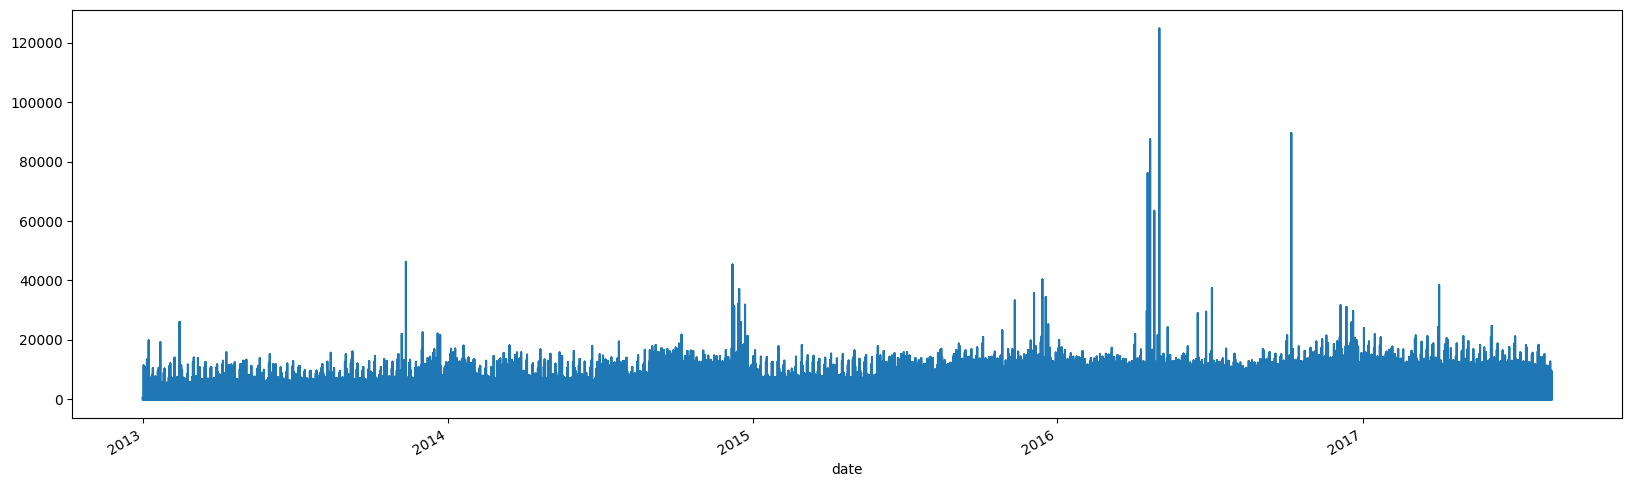

In [5]:
train['sales'].plot(figsize=(20,6))

<AxesSubplot: xlabel='date'>

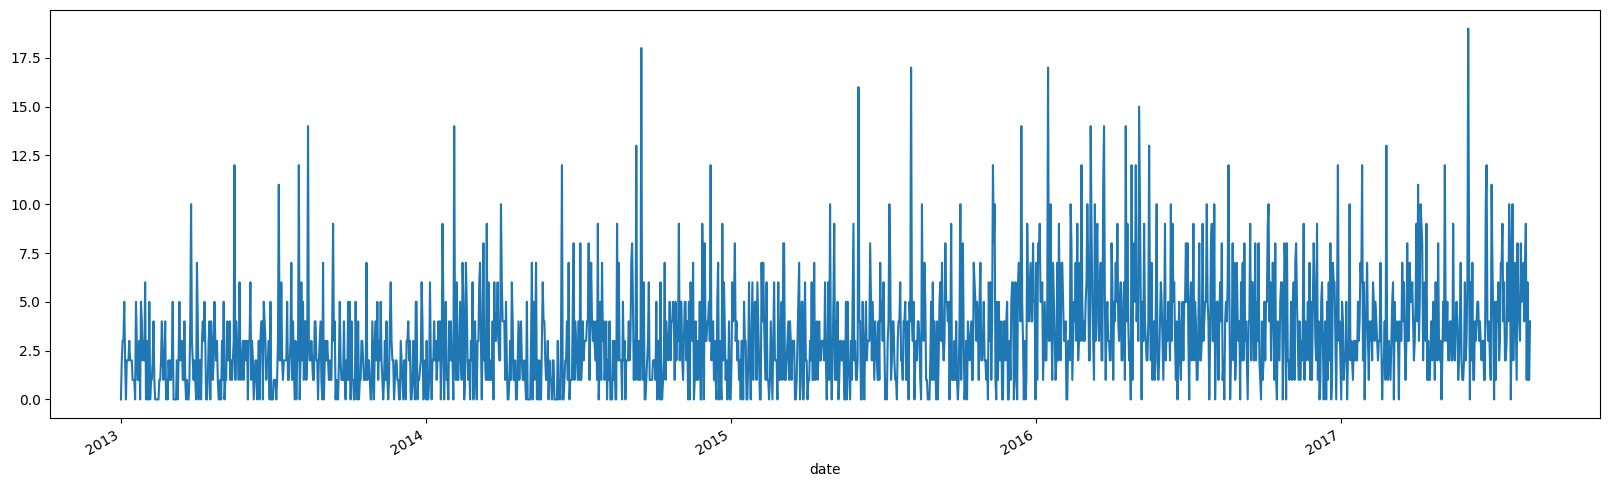

In [3]:
df = train[(train['store_nbr']==1) & (train['family']=='AUTOMOTIVE')]
df.sales.plot(figsize=(20,6))

# ARIMA

In [4]:
df_train, df_test = train_test_split(df, test_size=0.10, random_state=5, shuffle=False)

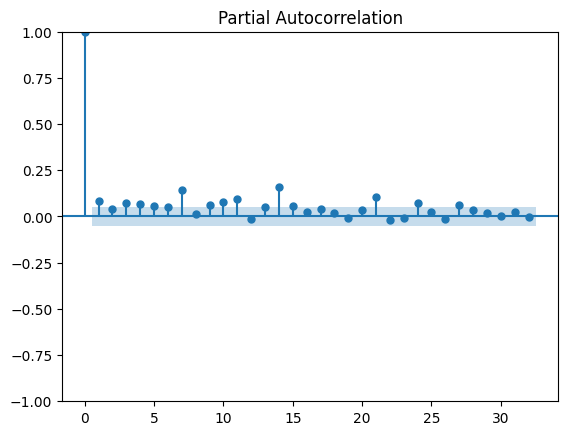

In [7]:
plot_pacf(df_train.sales);

Augmented dicky fuller test - null hypothesis is assumes the time series to non stationary, reject null if test statistic is less then critical value 
Is or not stationary, if not, take away trends, cyclicality, noise and seasonality 
Auto correlation is when a time series is correlated to its shifted self 
Create stationarity, then attempt to forecast with stationary model
Tune p, q, d
Two things: Partial auto correlation function for p, Auto-correlation function for q, d is

Research how to forecast multilabel time series 
Feature modeling

In [8]:
results = sm.tsa.stattools.adfuller(df_train.sales, autolag="AIC",regresults=True)
dfoutput = pd.Series(results[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key, value in results[2].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Test Statistic                                                          -3.89194
p-value                                                                 0.002095
#Lags Used                     {'1%': -3.434743423170358, '5%': -2.8634804142...
Number of Observations Used                 Augmented Dickey-Fuller Test Results
Critical Value (1%)                                                    -3.434743
Critical Value (5%)                                                     -2.86348
Critical Value (10%)                                                   -2.567803
dtype: object


Given the results, the time series for this scenario is stationary. 

<AxesSubplot: xlabel='date'>

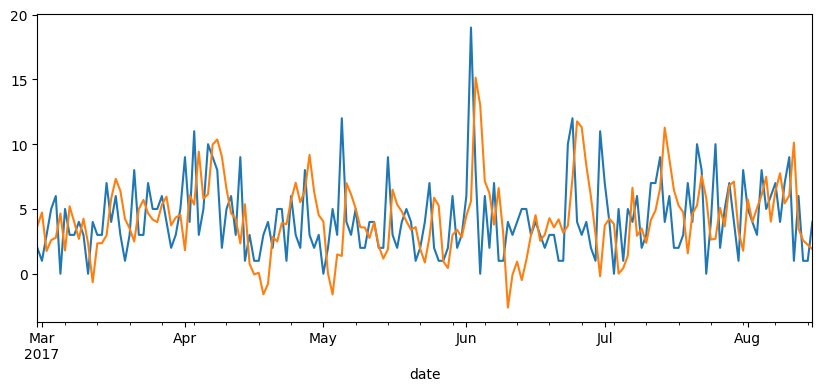

In [9]:
model = sm.tsa.arima.model.ARIMA(df.sales, order=(30, 5, 0))
model_fit = model.fit()
pred = model_fit.predict(start=len(df_train), end=len(df_train)+len(df_test)-1)
df_test.sales.plot(figsize=(10,4))
pred.plot();

## Hypertuning

In [5]:
def compare_to_test(model, df_test, df_train):
    model_fit = model.fit()
    pred = model_fit.predict(start=len(df_train), end=len(df_train)+len(df_test)-1)
    df_test.sales.plot(figsize=(10,4))
    pred.plot()
    r_two = r2_score(df_test.sales, pred)
    rmse = mean_squared_error(df_test.sales, pred, squared=False)
    print("R2 Score: ", r_two)
    print("Mean Absolute Error: ", mean_absolute_error(df_test.sales, pred))
    print("Root Mean Squared Error: ", rmse)

R2 Score:  -0.7745437543995253
Mean Absolute Error:  2.9514993659673547
Root Mean Squared Error:  3.8354985486259126


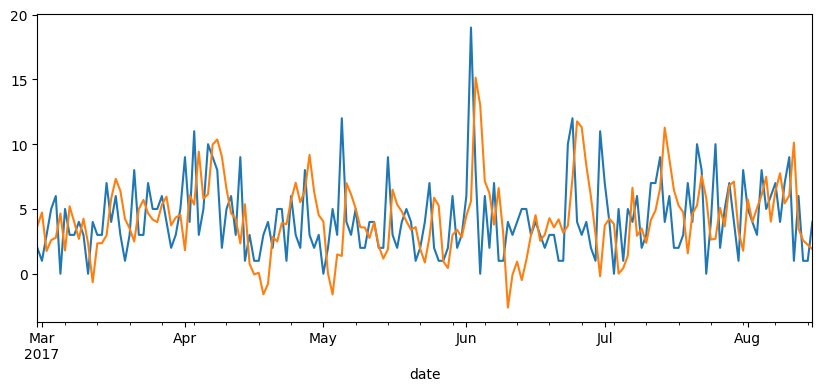

In [12]:
compare_to_test(model, df_test, df_train)

<AxesSubplot: xlabel='date'>

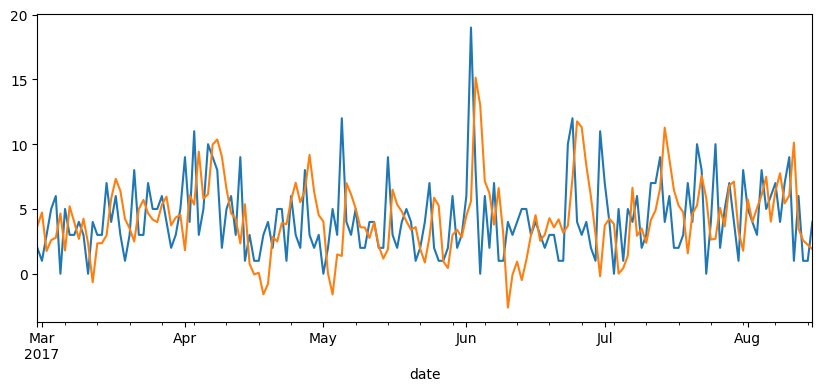

In [10]:
model2 = sm.tsa.arima.model.ARIMA(df.sales, order=(6, 1, 0))
compare_to_test(model2, df_test, df_train)

R2 Score:  0.05901134233638017
Mean Absolute Error:  2.0826242207512835
Root Mean Squared Error:  2.792998233460736


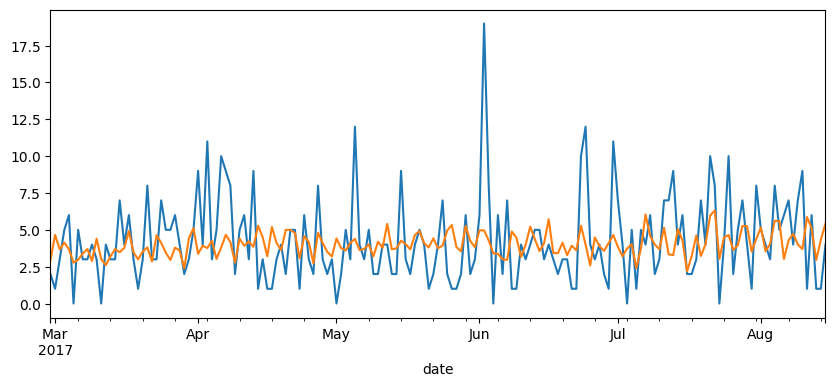

In [14]:
model3 = sm.tsa.arima.model.ARIMA(df.sales, order=(50, 1, 2))
compare_to_test(model3, df_test, df_train)

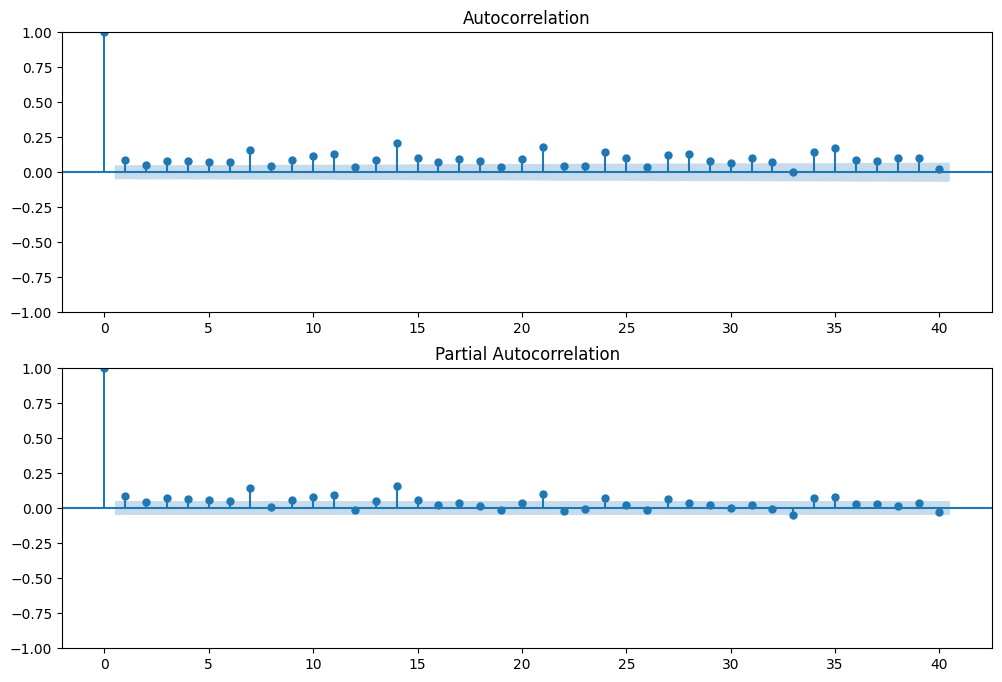

In [15]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df_train.sales, lags=40, ax=ax1) # 
ax2 = fig.add_subplot(212)
fig = plot_pacf(df_train.sales, lags=40, ax=ax2)# , lags=40

## Hypertuning with SARIMA

R2 Score:  -1.006914895282362
Mean Absolute Error:  3.2047983426839606
Root Mean Squared Error:  4.078898936298522


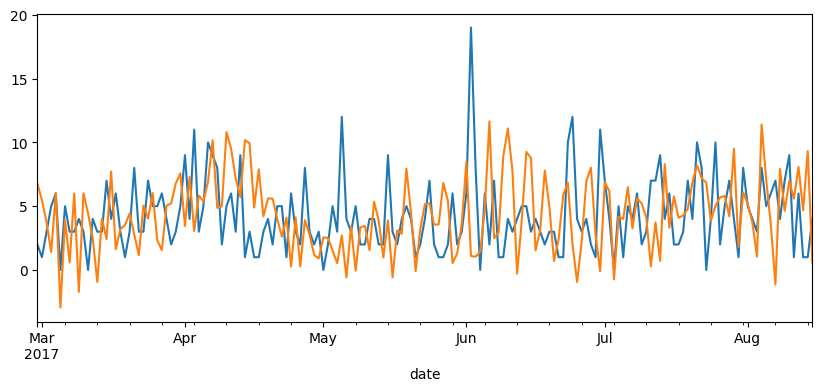

In [69]:
model4 = sm.tsa.arima.model.ARIMA(df.sales, order=(50, 1, 2), seasonal_order=(0, 4, 1, 4))
compare_to_test(model4, df_test, df_train)

R2 Score:  -1.006914895282362
Mean Absolute Error:  3.2047983426839606
Root Mean Squared Error:  4.078898936298522


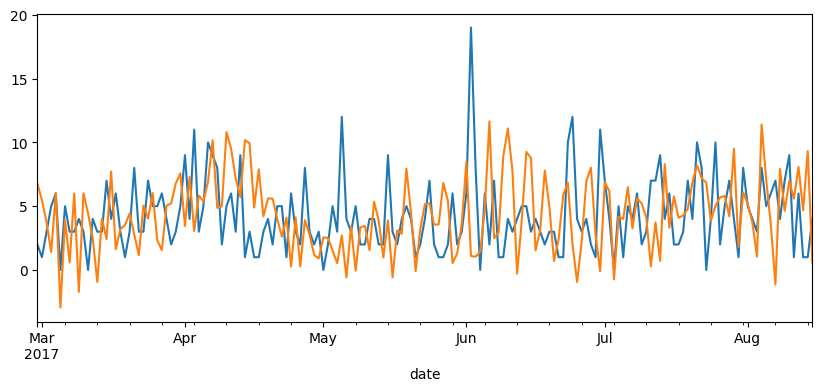

In [70]:
model5 = sm.tsa.arima.model.ARIMA(df.sales, order=(50, 1, 2), seasonal_order=(0, 3, 0, 12))
compare_to_test(model5, df_test, df_train)

# Data cleaning and engineering for exogenous features

Wages in the public sector are paid every two weeks on the 15 th and on the last day of the month. Supermarket sales could be affected by this. Therefore, I will include an indicator column for this. On top of that, I will create indicators for holidays along with utilizing the daily oil price for Ecuador, considering that it is an oil-dependent country and it's economical health is highly vulnerable to shocks in oil prices.

In [6]:
stores = pd.read_csv('stores.csv')
holidays = pd.read_csv('holidays_events.csv')
oil = pd.read_csv('oil.csv')
holidays.date = pd.to_datetime(holidays.date)
oil.date = pd.to_datetime(oil.date)

In [6]:
holidays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         350 non-null    datetime64[ns]
 1   type         350 non-null    object        
 2   locale       350 non-null    object        
 3   locale_name  350 non-null    object        
 4   description  350 non-null    object        
 5   transferred  350 non-null    bool          
dtypes: bool(1), datetime64[ns](1), object(4)
memory usage: 14.1+ KB


In [8]:
holidays.head(20)

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
5,2012-05-12,Holiday,Local,Puyo,Cantonizacion del Puyo,False
6,2012-06-23,Holiday,Local,Guaranda,Cantonizacion de Guaranda,False
7,2012-06-25,Holiday,Regional,Imbabura,Provincializacion de Imbabura,False
8,2012-06-25,Holiday,Local,Latacunga,Cantonizacion de Latacunga,False
9,2012-06-25,Holiday,Local,Machala,Fundacion de Machala,False


In [42]:
stores.head(20)

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4
5,6,Quito,Pichincha,D,13
6,7,Quito,Pichincha,D,8
7,8,Quito,Pichincha,D,8
8,9,Quito,Pichincha,B,6
9,10,Quito,Pichincha,C,15


In [43]:
stores.state.value_counts()

Pichincha                         19
Guayas                            11
Santo Domingo de los Tsachilas     3
Azuay                              3
Manabi                             3
Cotopaxi                           2
Tungurahua                         2
Los Rios                           2
El Oro                             2
Chimborazo                         1
Imbabura                           1
Bolivar                            1
Pastaza                            1
Santa Elena                        1
Loja                               1
Esmeraldas                         1
Name: state, dtype: int64

In [46]:
stores.city.value_counts()

Quito            18
Guayaquil         8
Cuenca            3
Santo Domingo     3
Manta             2
Latacunga         2
Machala           2
Ambato            2
Quevedo           1
Esmeraldas        1
Loja              1
Libertad          1
Playas            1
Daule             1
Babahoyo          1
Salinas           1
Puyo              1
Guaranda          1
Ibarra            1
Riobamba          1
Cayambe           1
El Carmen         1
Name: city, dtype: int64

There are city-wide holidays, state-wide holidays and nation-wide holidays. 

In [7]:
len(holidays.date.unique())

312

Some holidays occur on the same day. The oil dataset doesn't have prices for every single day. Therefore, my first step is to fill in the missing days via interpolation. 

In [7]:
dates = pd.DataFrame(train.index.unique())
exog = dates.merge(oil, how='left', left_on=dates['date'], right_on=oil['date'])
exog = exog[['date_x', 'dcoilwtico']]
exog = exog.rename(columns={'date_x': 'date'})
exog['dcoilwtico'] = exog['dcoilwtico'].interpolate(method='nearest')
exog

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-05,93.12
...,...,...
1679,2017-08-11,48.81
1680,2017-08-12,48.81
1681,2017-08-13,47.59
1682,2017-08-14,47.59


In [8]:
exog['dcoilwtico'].isnull().sum()

1

The only remaining null is the very first entry.

In [8]:
exog['dcoilwtico'][0] = exog['dcoilwtico'][1:10].mean()
exog

,date,dcoilwtico
0,2013-01-01,93.205556
1,2013-01-02,93.140000
2,2013-01-03,92.970000
3,2013-01-04,93.120000
4,2013-01-05,93.120000
...,...,...
1679,2017-08-11,48.810000
1680,2017-08-12,48.810000
1681,2017-08-13,47.590000
1682,2017-08-14,47.590000


In [10]:
holidays

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False


In [9]:
holidays_city = holidays[holidays['locale']=='Local']
holidays_state = holidays[holidays['locale']=='Regional']
holidays_national = holidays[holidays['locale']=='National']

In [10]:
indicator_holidays_national = exog.merge(holidays_national, how='left', left_on=exog['date'], right_on=holidays_national['date'])
indicator_holidays_national = indicator_holidays_national[['date_x', 'date_y']]
indicator_holidays_national.date_y[indicator_holidays_national.date_y.notnull()] = 1
indicator_holidays_national = indicator_holidays_national.fillna(0)
indicator_holidays_national = indicator_holidays_national.rename(columns={'date_x':'date', 'date_y': 'National Holiday'})
indicator_holidays_national

,date,National Holiday
0,2013-01-01,1
1,2013-01-02,0
2,2013-01-03,0
3,2013-01-04,0
4,2013-01-05,1
...,...,...
1683,2017-08-11,1
1684,2017-08-12,0
1685,2017-08-13,0
1686,2017-08-14,0


There seem to be duplicates that have to be removed.

In [11]:
indicator_holidays_national = indicator_holidays_national.drop_duplicates()
indicator_holidays_national

,date,National Holiday
0,2013-01-01,1
1,2013-01-02,0
2,2013-01-03,0
3,2013-01-04,0
4,2013-01-05,1
...,...,...
1683,2017-08-11,1
1684,2017-08-12,0
1685,2017-08-13,0
1686,2017-08-14,0


In [14]:
holidays_state

,date,type,locale,locale_name,description,transferred
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
7,2012-06-25,Holiday,Regional,Imbabura,Provincializacion de Imbabura,False
23,2012-11-06,Holiday,Regional,Santo Domingo de los Tsachilas,Provincializacion de Santo Domingo,False
24,2012-11-07,Holiday,Regional,Santa Elena,Provincializacion Santa Elena,False
47,2013-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
58,2013-06-25,Holiday,Regional,Imbabura,Provincializacion de Imbabura,False
76,2013-11-06,Holiday,Regional,Santo Domingo de los Tsachilas,Provincializacion de Santo Domingo,False
77,2013-11-07,Holiday,Regional,Santa Elena,Provincializacion Santa Elena,False
96,2014-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
112,2014-06-25,Holiday,Regional,Imbabura,Provincializacion de Imbabura,False


In [12]:
indicator_holidays_state = pd.pivot_table(holidays_state[['date','locale_name']], columns=['locale_name'], index='date', aggfunc=len, fill_value=0)
indicator_holidays_state

locale_name,Cotopaxi,Imbabura,Santa Elena,Santo Domingo de los Tsachilas
date,,,,
2012-04-01,1,0,0,0
2012-06-25,0,1,0,0
2012-11-06,0,0,0,1
2012-11-07,0,0,1,0
2013-04-01,1,0,0,0
2013-06-25,0,1,0,0
2013-11-06,0,0,0,1
2013-11-07,0,0,1,0
2014-04-01,1,0,0,0


In [13]:
indicator_holidays_state = exog.merge(indicator_holidays_state, how='left', left_on=exog['date'], right_on=indicator_holidays_state.index)
indicator_holidays_state = indicator_holidays_state.drop(columns=['key_0', 'dcoilwtico'])
indicator_holidays_state = indicator_holidays_state.fillna(0)
indicator_holidays_state

,date,Cotopaxi,Imbabura,Santa Elena,Santo Domingo de los Tsachilas
0,2013-01-01,0.0,0.0,0.0,0.0
1,2013-01-02,0.0,0.0,0.0,0.0
2,2013-01-03,0.0,0.0,0.0,0.0
3,2013-01-04,0.0,0.0,0.0,0.0
4,2013-01-05,0.0,0.0,0.0,0.0
...,...,...,...,...,...
1679,2017-08-11,0.0,0.0,0.0,0.0
1680,2017-08-12,0.0,0.0,0.0,0.0
1681,2017-08-13,0.0,0.0,0.0,0.0
1682,2017-08-14,0.0,0.0,0.0,0.0


In [17]:
holidays_city

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
5,2012-05-12,Holiday,Local,Puyo,Cantonizacion del Puyo,False
...,...,...,...,...,...,...
339,2017-12-05,Additional,Local,Quito,Fundacion de Quito-1,False
340,2017-12-06,Holiday,Local,Quito,Fundacion de Quito,True
341,2017-12-08,Holiday,Local,Loja,Fundacion de Loja,False
342,2017-12-08,Transfer,Local,Quito,Traslado Fundacion de Quito,False


In [14]:
indicator_holidays_city = pd.pivot_table(holidays_city[['date','locale_name']], columns=['locale_name'], index='date', aggfunc=len, fill_value=0)
indicator_holidays_city

locale_name,Ambato,Cayambe,Cuenca,El Carmen,Esmeraldas,Guaranda,Guayaquil,Ibarra,Latacunga,Libertad,Loja,Machala,Manta,Puyo,Quevedo,Quito,Riobamba,Salinas,Santo Domingo
date,,,,,,,,,,,,,,,,,,,
2012-03-02,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2012-04-12,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2012-04-14,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2012-04-21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2012-05-12,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-11-12,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2017-12-05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2017-12-06,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [15]:
indicator_holidays_city = exog.merge(indicator_holidays_city, how='left', left_on=exog['date'], right_on=indicator_holidays_city.index)
indicator_holidays_city = indicator_holidays_city.drop(columns=['key_0', 'dcoilwtico'])
indicator_holidays_city = indicator_holidays_city.fillna(0)
indicator_holidays_city

,date,Ambato,Cayambe,Cuenca,El Carmen,Esmeraldas,Guaranda,Guayaquil,Ibarra,Latacunga,Libertad,Loja,Machala,Manta,Puyo,Quevedo,Quito,Riobamba,Salinas,Santo Domingo
0,2013-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2013-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2013-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2013-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2013-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1679,2017-08-11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1680,2017-08-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1681,2017-08-13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1682,2017-08-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
exog = exog.merge(indicator_holidays_national, on='date')\
           .merge(indicator_holidays_state, on='date')\
           .merge(indicator_holidays_city, on='date')
exog = exog.set_index('date')
exog

,dcoilwtico,National Holiday,Cotopaxi,Imbabura,Santa Elena,Santo Domingo de los Tsachilas,Ambato,Cayambe,Cuenca,El Carmen,...,Libertad,Loja,Machala,Manta,Puyo,Quevedo,Quito,Riobamba,Salinas,Santo Domingo
date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,93.205556,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-01-02,93.140000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-01-03,92.970000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-01-04,93.120000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-01-05,93.120000,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-11,48.810000,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-08-12,48.810000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-08-13,47.590000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


R2 Score:  0.09696789605327594
Mean Absolute Error:  2.0388352205566753
Root Mean Squared Error:  2.7360880031275117


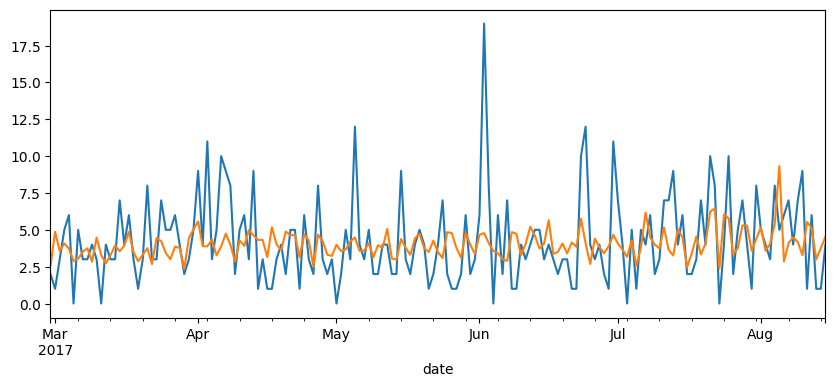

In [28]:
model6 = sm.tsa.arima.model.ARIMA(df.sales, exog=exog, order=(50, 1, 2))
compare_to_test(model6, df_test, df_train)

R2 Score:  -0.19870664903355384
Mean Absolute Error:  2.350657738196889
Root Mean Squared Error:  3.1523535812557575


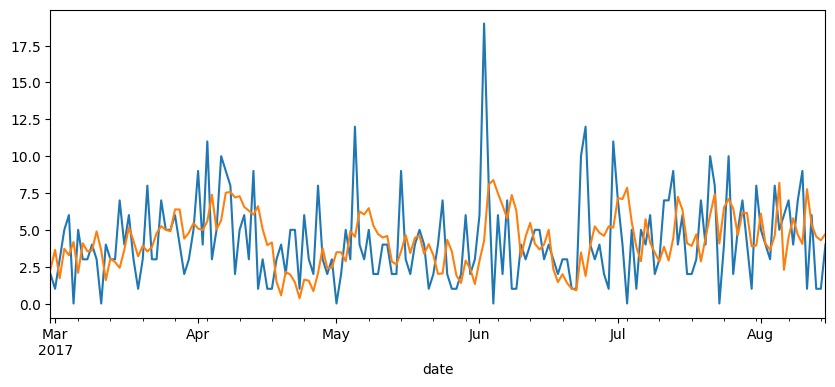

In [30]:
model7 = sm.tsa.arima.model.ARIMA(df.sales, exog=exog, order=(30, 4, 3))
compare_to_test(model7, df_test, df_train)

R2 Score:  -1.0041313311271063
Mean Absolute Error:  3.2087333243137635
Root Mean Squared Error:  4.076069265605914


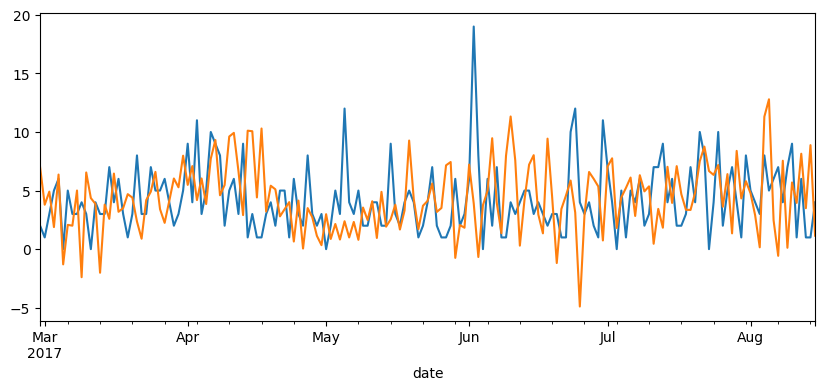

In [32]:
model8 = sm.tsa.arima.model.ARIMA(df.sales, exog=exog, order=(50, 1, 2), seasonal_order=(0, 4, 1, 4))
compare_to_test(model8, df_test, df_train)

R2 Score:  -0.23395179922298537
Mean Absolute Error:  2.4022722190517216
Root Mean Squared Error:  3.19836161384334


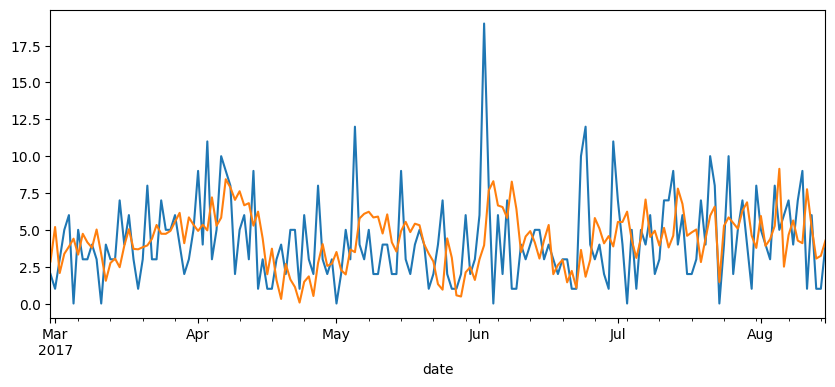

In [33]:
model9 = sm.tsa.arima.model.ARIMA(df.sales, exog=exog, order=(50, 4, 3))
compare_to_test(model9, df_test, df_train)

R2 Score:  -9.357104424284895
Mean Absolute Error:  7.329164136763171
Root Mean Squared Error:  9.266114111317195


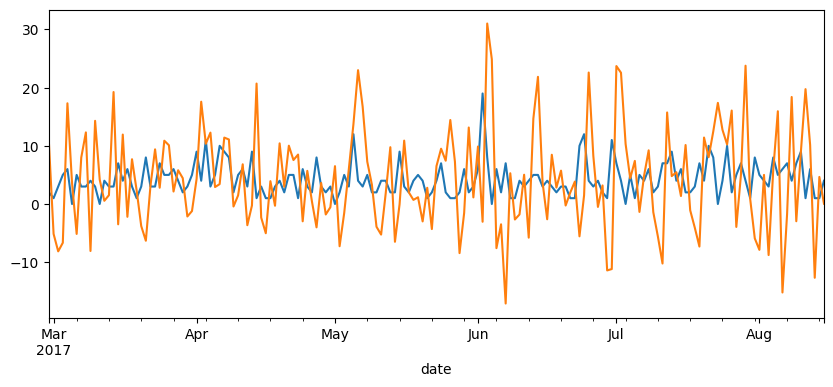

In [34]:
model8 = sm.tsa.arima.model.ARIMA(df.sales, exog=exog, order=(50, 7, 2), seasonal_order=(0, 4, 12, 4))
compare_to_test(model8, df_test, df_train)

R2 Score:  -0.707438116015805
Mean Absolute Error:  2.9812746813748348
Root Mean Squared Error:  3.762278604302648


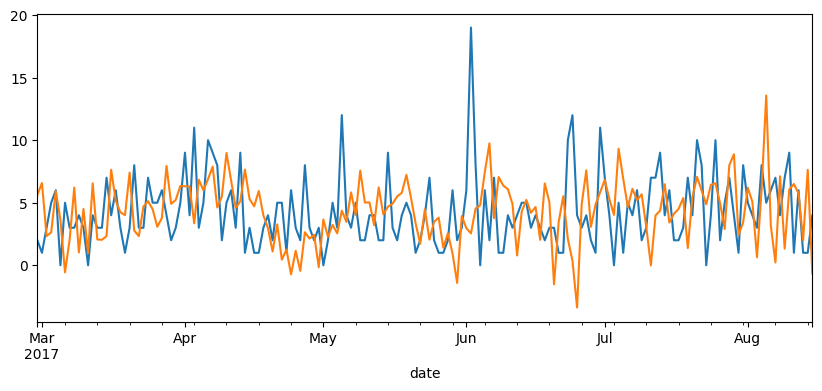

In [18]:
model9 = sm.tsa.arima.model.ARIMA(df.sales, exog=exog, order=(50, 2, 2), seasonal_order=(0, 4, 12, 4))
compare_to_test(model9, df_test, df_train)

R2 Score:  0.07747661123446037
Mean Absolute Error:  2.082555635852437
Root Mean Squared Error:  2.7654585887349667


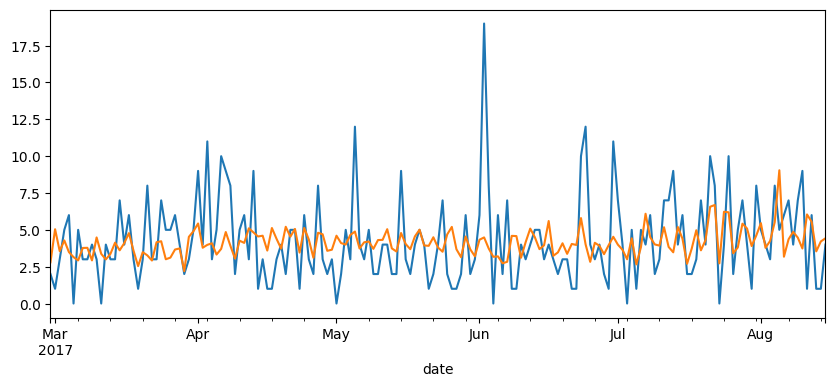

In [19]:
model10 = sm.tsa.arima.model.ARIMA(df.sales, exog=exog, order=(50, 2, 2))
compare_to_test(model10, df_test, df_train)

Linear regression, decision tree regressor, random forest regressor, adaboost, xgboost

N-BEATS, DeepAR, Spacetimeformer, Temporal Fusion Transformer

To do: get model working with exog, ensure error from same time periods, incorporate all prices

Advanced: aggregate forecasts together by store and product
review p, d, q and tune to below 3 rmse